In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dfply import *

%matplotlib inline

In [2]:
#Download data from: "https://btsd.ethz.ch/shareddata/"
import os
import skimage
from skimage import io
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels


train_data_directory = "./data/Training" 
test_data_directory = "./data/Testing"

images, labels = load_data(train_data_directory)

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.        ,  0.98387097,  1.96774194,  2.9516129 ,  3.93548387,
         4.91935484,  5.90322581,  6.88709677,  7.87096774,  8.85483871,
         9.83870968, 10.82258065, 11.80645161, 12.79032258, 13.77419355,
        14.75806452, 15.74193548, 16.72580645, 17.70967742, 18.69354839,
        19.67741935, 20.66129032, 21.64516129, 22.62903226, 23.61290323,
        24.59677419, 25.58064516, 26.56451613, 27.5483871 , 28.53225806,
        29.51612903, 30.5       , 31.48387097, 32.46774194, 33.4516129 ,
        34.43548387, 35.41935484, 36.40322581, 37.38709677, 38.3709

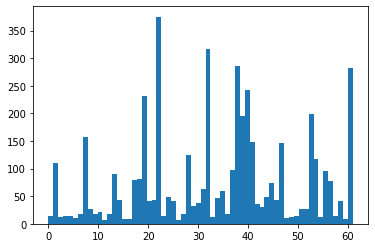

In [3]:
plt.hist(labels, 62)

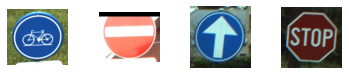

In [4]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

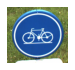

shape: (236, 256, 3), min: 0, max: 255


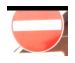

shape: (133, 164, 3), min: 0, max: 255


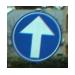

shape: (122, 121, 3), min: 0, max: 255


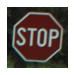

shape: (123, 123, 3), min: 0, max: 215


In [5]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

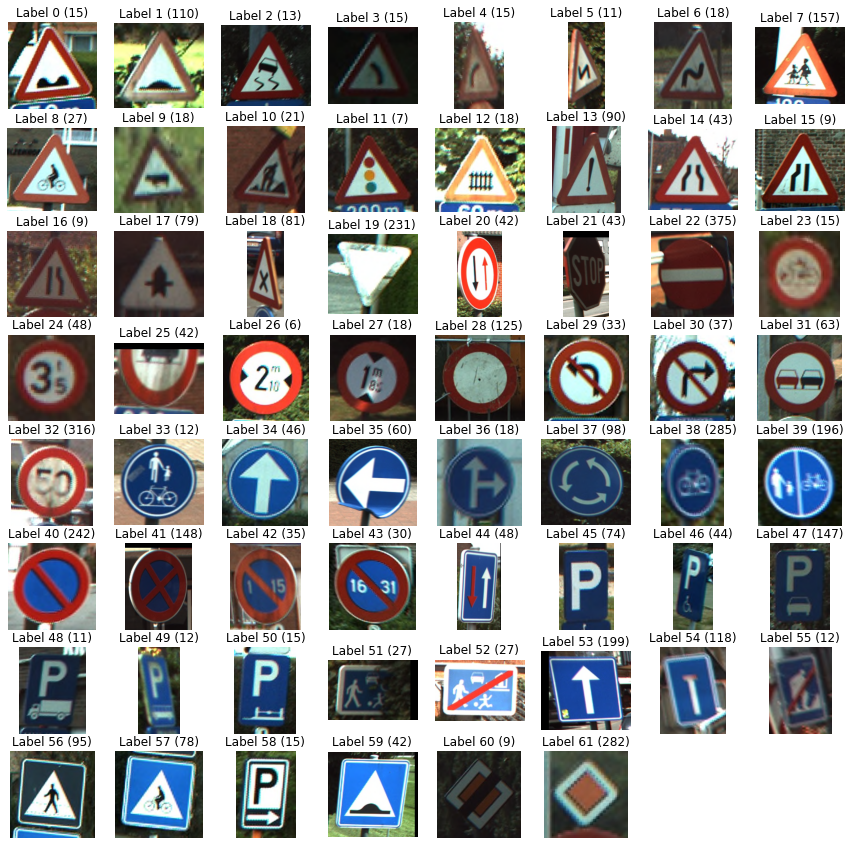

In [6]:
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [7]:
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [8]:
def view_signs(data):
    traffic_signs = [300, 2250, 3650, 4000]
    
    for i in range(len(traffic_signs)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        plt.imshow(data[traffic_signs[i]])
        plt.subplots_adjust(wspace=0.5)
    
    plt.show()

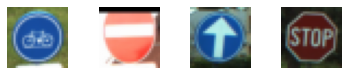

In [9]:
view_signs(images28)

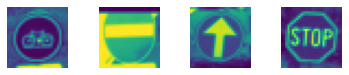

In [10]:
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

view_signs(images28)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(62)
])

2021-10-29 13:57:01.347735: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [13]:
model.fit(images28,np.array(labels),epochs=10)

2021-10-29 13:57:14.780429: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
143/143 [==============================] - 1s 3ms/step - loss: 2.8438 - accuracy: 0.3827
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 1.8464 - accuracy: 0.6059
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 1.4019 - accuracy: 0.6879
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 1.1306 - accuracy: 0.7419
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.7886
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.8086 - accuracy: 0.8131
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.8411
Epoch 8/10
143/143 [==============================] - 1s 4ms/step - loss: 0.6273 - accuracy: 0.8514
Epoch 9/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.8754
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.8826

In [14]:
test_images, test_labels = load_data(test_data_directory)

In [15]:
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]
test_images28 = rgb2gray(np.array(test_images28))

In [16]:
test_loss, test_acc = model.evaluate(test_images28,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc)

79/79 - 0s - loss: 0.6234 - accuracy: 0.8532

Test accuracy: 0.85317462682724


[22, 22, 1, 41, 7, 38, 32, 39, 38, 19]
[22, 22, 1, 40, 7, 38, 32, 38, 38, 19]


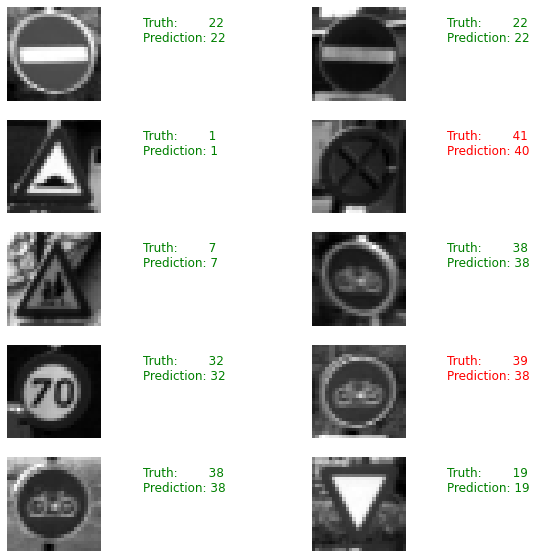

In [17]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

#predict labels for selected images
predictions  = model.predict(images28)
predicted  = [np.argmax(predictions[i]) for i in range(len(predictions))]
predicted_images = [predicted[i] for i in sample_indexes]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted_images)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted_images[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

Neural Network Model 2

In [18]:
nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
nn_model.add(tf.keras.layers.Dense(200, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
nn_model.add(tf.keras.layers.Dropout(0.4))
nn_model.add(tf.keras.layers.Dense(62, activation='softmax'))

In [19]:
nn_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

nn_model.fit(images28,np.array(labels),epochs=10)

nn_test_loss, nn_test_acc = model.evaluate(test_images28,np.array(test_labels),verbose=2)
print('\nTest accuracy:',nn_test_acc)

Epoch 1/10


/usr/local/lib/python3.9/site-packages/keras/backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


143/143 [==============================] - 1s 3ms/step - loss: 3.1681 - accuracy: 0.2588
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 2.1752 - accuracy: 0.4817
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 1.6423 - accuracy: 0.5821
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 1.3463 - accuracy: 0.6481
Epoch 5/10
143/143 [==============================] - 1s 4ms/step - loss: 1.1197 - accuracy: 0.6949
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.9739 - accuracy: 0.7353
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.7563
Epoch 8/10
143/143 [==============================] - 0s 3ms/step - loss: 0.7729 - accuracy: 0.7795
Epoch 9/10
143/143 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.8063
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.8035
79/79 - 0s

# Investigate impact of PCA/LDA regularization on performance of model

In [20]:
flat_images28 = [images28[i].flatten() for i in range(len(images28))]

flat_images28[0].shape

(784,)

In [21]:
from sklearn.decomposition import PCA
pca=PCA()
pca_images28 = pca.fit_transform(flat_images28)
pca_images28.shape

(4575, 784)

Text(0, 0.5, 'cumulative explained variance')

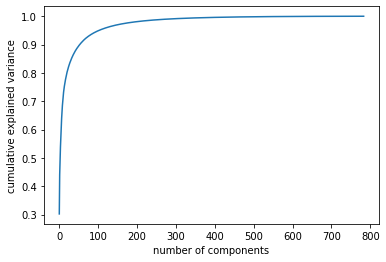

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [23]:
pca=PCA(200)
pca_images28 = pca.fit_transform(flat_images28)

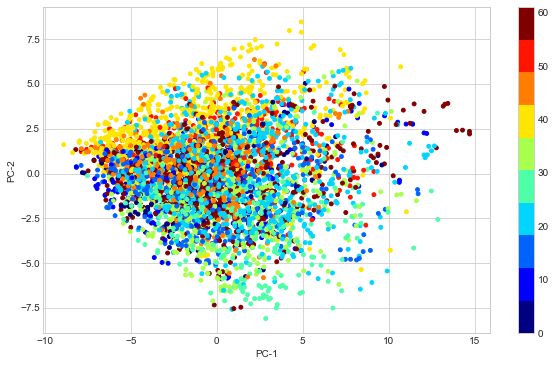

In [24]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(pca_images28[:, 0], pca_images28[:, 1], s = 15,
            cmap = c_map , c = np.array(labels))
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [25]:
pca_images28

array([[-9.45733109e-02, -1.21128161e+00, -7.43038067e-01, ...,
        -4.94496195e-02, -2.13628356e-02,  1.09942740e-01],
       [-1.98288755e+00, -1.09904992e+00, -2.75894226e+00, ...,
         1.78954027e-02, -1.10717044e-01,  1.37312109e-01],
       [-2.85117612e+00, -1.78588085e+00, -1.11669961e+00, ...,
        -1.35697376e-01,  6.30186971e-02, -1.49882734e-02],
       ...,
       [-3.36307490e+00,  1.46789995e+00, -3.75700017e-01, ...,
         2.64118659e-02,  1.74993113e-02, -2.04776104e-02],
       [-2.10861029e+00, -8.73832267e-01,  1.07818439e+00, ...,
        -4.51511278e-02, -7.25641918e-02,  6.17611009e-02],
       [ 5.21983050e+00, -9.60363004e-01,  9.46851740e-01, ...,
         4.29196107e-02,  8.71549488e-02, -5.04075815e-03]])

In [26]:
pca_model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(62)
])

pca_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


pca_model.fit(pca_images28,np.array(labels),epochs=10)

Epoch 1/10
143/143 [==============================] - 1s 3ms/step - loss: 2.8514 - accuracy: 0.3545
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 1.4001 - accuracy: 0.6673
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.7873
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.8369
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8789
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.9080
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.9207
Epoch 8/10
143/143 [==============================] - 1s 4ms/step - loss: 0.2166 - accuracy: 0.9423
Epoch 9/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1768 - accuracy: 0.9499
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1542 - accuracy: 0.9602

In [27]:
flat_test_images28 = [test_images28[i].flatten() for i in range(len(test_images28))]
flat_test_images28_pca = pca.transform(flat_test_images28)

test_loss_pca, test_acc_pca = pca_model.evaluate(flat_test_images28_pca,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc_pca)

79/79 - 0s - loss: 0.3559 - accuracy: 0.9071

Test accuracy: 0.9071428775787354


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
flat_images28_lda = lda.fit(flat_images28,np.array(labels)).transform(flat_images28)

Text(0, 0.5, 'cumulative explained variance')

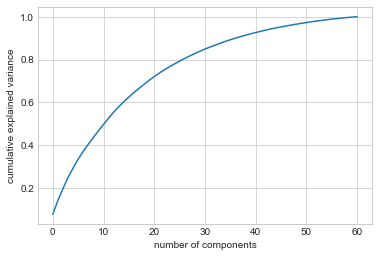

In [29]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

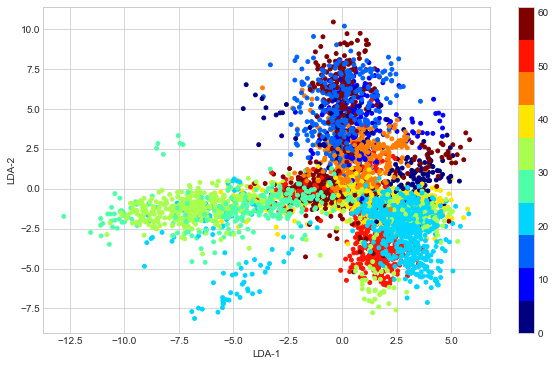

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(flat_images28_lda[:, 0], flat_images28_lda[:, 1], s = 15,
            cmap = c_map , c = np.array(labels))
plt.colorbar()
plt.xlabel('LDA-1') , plt.ylabel('LDA-2')
plt.show()

In [31]:
lda_model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(62)
])

lda_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


lda_model.fit(flat_images28_lda,np.array(labels),epochs=10)

Epoch 1/10
143/143 [==============================] - 1s 3ms/step - loss: 1.6971 - accuracy: 0.6675
Epoch 2/10
143/143 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.9266
Epoch 3/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9541
Epoch 4/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.9666
Epoch 5/10
143/143 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9742
Epoch 6/10
143/143 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9753
Epoch 7/10
143/143 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9790
Epoch 8/10
143/143 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9845
Epoch 9/10
143/143 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9847
Epoch 10/10
143/143 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9851

In [32]:
flat_test_images28_lda = lda.transform(flat_test_images28)

test_loss_lda, test_acc_lda = lda_model.evaluate(flat_test_images28_lda,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc_lda)

79/79 - 0s - loss: 0.7352 - accuracy: 0.8690

Test accuracy: 0.8690476417541504


[1, 13, 6, 54, 1, 61, 7, 32, 61, 47]
[1, 13, 6, 54, 1, 61, 7, 32, 61, 47]


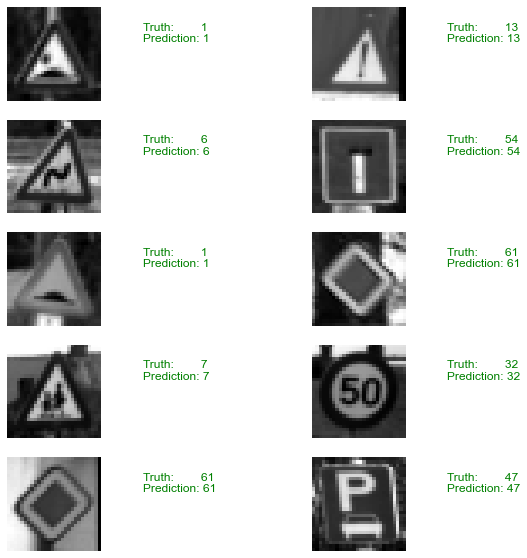

In [33]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

#predict labels for selected images
predictions  = pca_model.predict(pca_images28)
predicted  = [np.argmax(predictions[i]) for i in range(len(predictions))]
predicted_images = [predicted[i] for i in sample_indexes]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted_images)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted_images[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

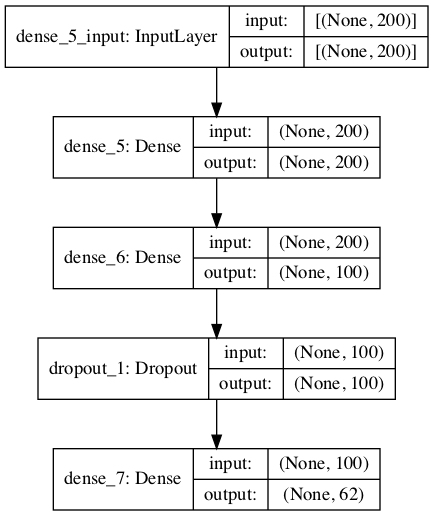

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(pca_model, 'pca_model.png', show_shapes=True)

In [35]:
pca_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 62)                6262      
Total params: 66,562
Trainable params: 66,562
Non-trainable params: 0
_________________________________________________________________


In [36]:
images32 = [transform.resize(image, (32, 32)) for image in images]
test_images32 = [transform.resize(image, (32, 32)) for image in test_images]

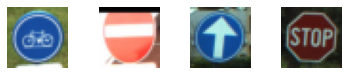

In [37]:
view_signs(images32)

# CNN model

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(62))

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(images32), np.array(labels), epochs=10, 
                    validation_data=(np.array(test_images32), np.array(test_labels)))

Epoch 1/10
143/143 [==============================] - 6s 33ms/step - loss: 2.4152 - accuracy: 0.4492 - val_loss: 1.2289 - val_accuracy: 0.6873
Epoch 2/10
143/143 [==============================] - 4s 31ms/step - loss: 0.8253 - accuracy: 0.7899 - val_loss: 0.5754 - val_accuracy: 0.8433
Epoch 3/10
143/143 [==============================] - 5s 32ms/step - loss: 0.3988 - accuracy: 0.8859 - val_loss: 0.3685 - val_accuracy: 0.8976
Epoch 4/10
143/143 [==============================] - 5s 32ms/step - loss: 0.2398 - accuracy: 0.9316 - val_loss: 0.2961 - val_accuracy: 0.9258
Epoch 5/10
143/143 [==============================] - 5s 32ms/step - loss: 0.1605 - accuracy: 0.9534 - val_loss: 0.3772 - val_accuracy: 0.8956
Epoch 6/10
143/143 [==============================] - 4s 29ms/step - loss: 0.1234 - accuracy: 0.9635 - val_loss: 0.2999 - val_accuracy: 0.9373
Epoch 7/10
143/143 [==============================] - 3s 22ms/step - loss: 0.1000 - accuracy: 0.9690 - val_loss: 0.3240 - val_accuracy: 0.9198

Epoch 1/10
143/143 [==============================] - 3s 21ms/step - loss: 0.0603 - accuracy: 0.9840 - val_loss: 0.2723 - val_accuracy: 0.9385
Epoch 2/10
143/143 [==============================] - 3s 20ms/step - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.2583 - val_accuracy: 0.9472
Epoch 3/10
143/143 [==============================] - 3s 19ms/step - loss: 0.0501 - accuracy: 0.9867 - val_loss: 0.2849 - val_accuracy: 0.9433
Epoch 4/10
143/143 [==============================] - 3s 18ms/step - loss: 0.0504 - accuracy: 0.9860 - val_loss: 0.2739 - val_accuracy: 0.9456
Epoch 5/10
143/143 [==============================] - 3s 18ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.3268 - val_accuracy: 0.9389
Epoch 6/10
143/143 [==============================] - 3s 19ms/step - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.2817 - val_accuracy: 0.9560
Epoch 7/10
143/143 [==============================] - 3s 18ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.2714 - val_accuracy: 0.9476

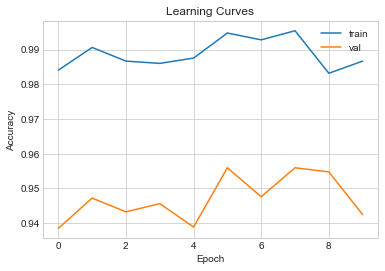

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
# fit the model
history = model.fit(np.array(images32), np.array(labels), epochs=10, 
                    validation_data=(np.array(test_images32), np.array(test_labels)))
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

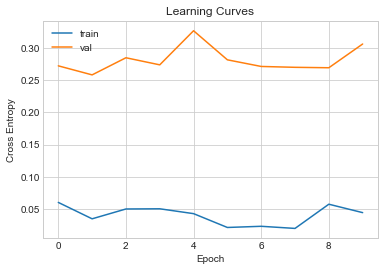

In [41]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(np.array(test_images32),np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc)

79/79 - 0s - loss: 0.3062 - accuracy: 0.9425

Test accuracy: 0.942460298538208


In [43]:
x_train = images28.reshape(images28.shape[0], images28.shape[1], images28.shape[2], 1)
x_test = test_images28.reshape(test_images28.shape[0], test_images28.shape[1], test_images28.shape[2], 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(62)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    x_train,
    np.array(labels),
    epochs=20,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test,np.array(test_labels),verbose=0)
print('\nTest accuracy:',test_acc)


Test accuracy: 0.9170634746551514


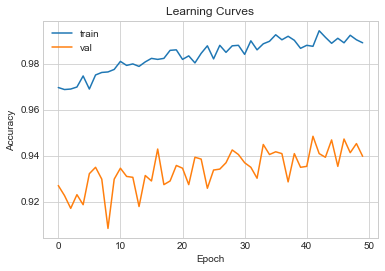

In [44]:
history = model.fit(x_train, np.array(labels), epochs=50, 
                    validation_data=(x_test, np.array(test_labels)),
                    verbose=0)

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

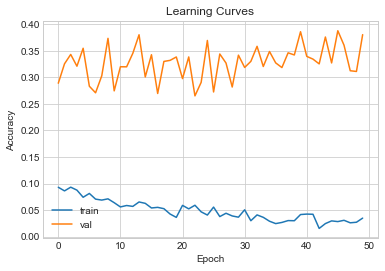

In [45]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [46]:
train_pca_images28 = pca_images28
test_pca_images28 = flat_test_images28_pca

In [47]:
pca_model2 = tf.keras.Sequential([
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(62)
])

pca_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

pca_model2.fit(
    train_pca_images28,
    np.array(labels),
    epochs=20,
    verbose=0
)

test_loss, test_acc = pca_model2.evaluate(test_pca_images28,np.array(test_labels),verbose=0)
print('\nTest accuracy:',test_acc)


Test accuracy: 0.8980158567428589


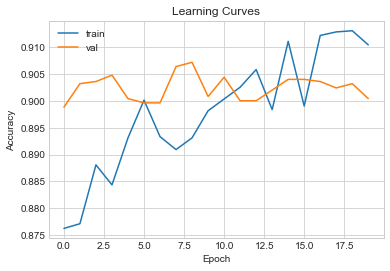

In [48]:
pca_history=pca_model2.fit(
    train_pca_images28,
    np.array(labels),
    validation_data=(test_pca_images28,np.array(test_labels)),
    epochs=20,
    verbose=0
)

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(pca_history.history['accuracy'], label='train')
plt.plot(pca_history.history['val_accuracy'], label='val')
plt.legend()

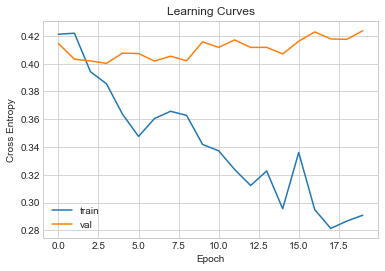

In [49]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(pca_history.history['loss'], label='train')
plt.plot(pca_history.history['val_loss'], label='val')
plt.legend()

In [50]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
    self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
    self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
    self.pool2 =tf.keras.layers.MaxPooling2D((2, 2))
    self.conv3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
    self.dropout =tf.keras.layers.Dropout(0.2)
    self.flat =tf.keras.layers.Flatten()
    self.Dense1 = tf.keras.layers.Dense(120, activation='relu')
    self.Output = tf.keras.layers.Dense(62)

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.dropout(x)
    x = self.flat(x)
    x = self.Dense1(x)
    return self.Output(x)

model = MyModel()

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(images32),
 np.array(labels),
 epochs=10, 
 verbose=0,
 validation_data=(np.array(test_images32), np.array(test_labels)))

test_loss, test_acc = model.evaluate(np.array(test_images32),np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc)

79/79 - 0s - loss: 0.2775 - accuracy: 0.9409

Test accuracy: 0.9408730268478394
